In [1]:
import pandas as pd

In [2]:
housing =pd.read_excel("realestate.xlsx")

In [3]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
housing['X1 transaction date'].value_counts()

2013.416667    58
2013.500000    47
2013.083333    46
2012.916667    38
2013.250000    32
2012.833333    31
2012.666667    30
2013.333333    29
2013.000000    28
2012.750000    27
2013.166667    25
2013.583333    23
Name: X1 transaction date, dtype: int64

In [6]:
housing.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'No'}>,
        <Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>],
       [<Axes: title={'center': 'X3 distance to the nearest MRT station'}>,
        <Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>],
       [<Axes: title={'center': 'X6 longitude'}>,
        <Axes: title={'center': 'Y house price of unit area'}>, <Axes: >]],
      dtype=object)

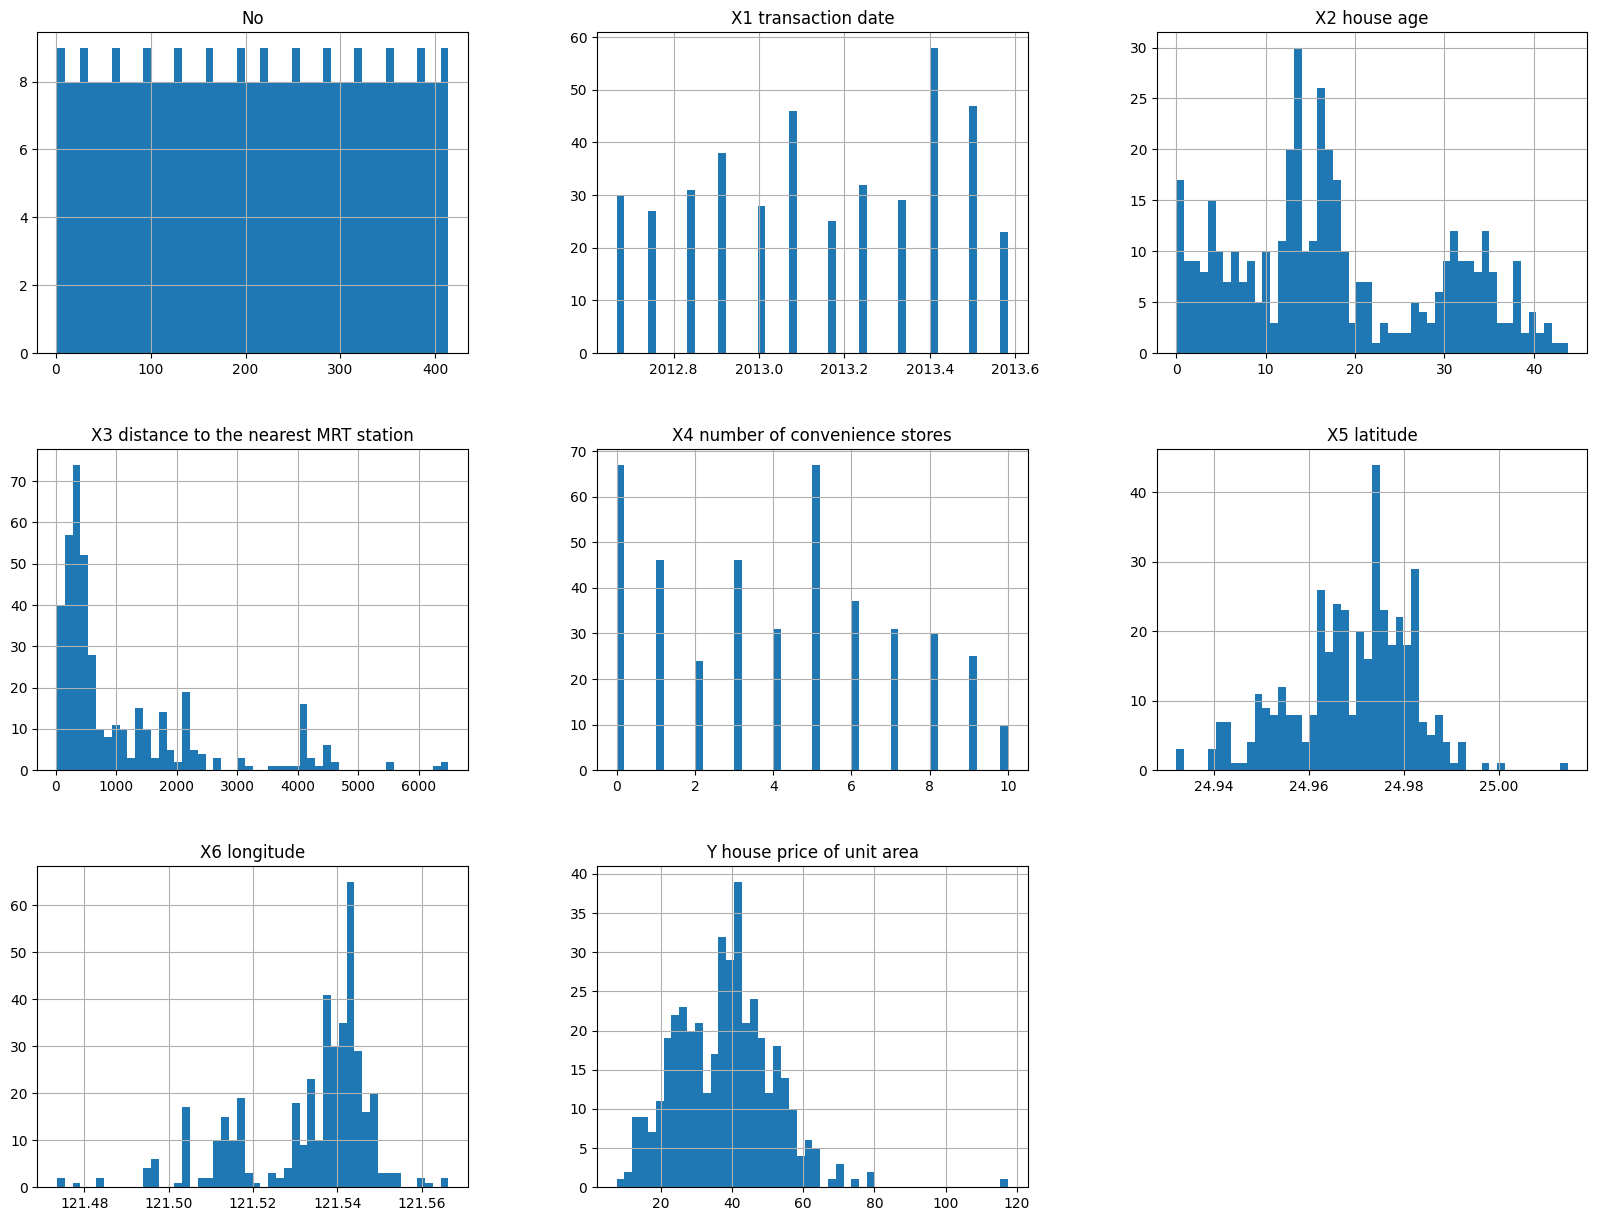

In [9]:
housing.hist(bins=50,figsize=(20,15))

In [21]:
#for learning purpose
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [19]:
#train_set,test_set=split_train_test(housing,0.2)

In [17]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set : {len(test_set)}\n")

Rows in train set: 332
Rows in test set : 82



In [23]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing, test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set : {len(test_set)}\n")

Rows in train set: 331
Rows in test set : 83



In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
split =StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['X1 transaction date']):
    strat_train_set = housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [27]:
strat_test_set['X1 transaction date'].value_counts()

2013.416667    12
2013.083333     9
2013.500000     9
2012.916667     8
2013.333333     6
2012.833333     6
2013.000000     6
2013.250000     6
2012.666667     6
2012.750000     5
2013.166667     5
2013.583333     5
Name: X1 transaction date, dtype: int64

In [29]:
strat_train_set['X1 transaction date'].value_counts()

2013.416667    46
2013.500000    38
2013.083333    37
2012.916667    30
2013.250000    26
2012.833333    25
2012.666667    24
2013.333333    23
2013.000000    22
2012.750000    22
2013.166667    20
2013.583333    18
Name: X1 transaction date, dtype: int64

In [30]:
12/9


1.2105263157894737

In [31]:
46/38

1.2105263157894737

In [32]:
#looking for correlations

In [33]:
corr_matrix=housing.corr()

In [35]:
corr_matrix['X1 transaction date'].sort_values(ascending=False)

X1 transaction date                       1.000000
Y house price of unit area                0.087529
X3 distance to the nearest MRT station    0.060880
X5 latitude                               0.035016
X2 house age                              0.017542
X4 number of convenience stores           0.009544
X6 longitude                             -0.041065
No                                       -0.048634
Name: X1 transaction date, dtype: float64

array([[<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X3 distance to the nearest MRT station'>,
        <Axes: xlabel='No', ylabel='X3 distance to the nearest MRT station'>],
       [<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='No'>,
        <Axes: xlabel='No', ylabel='No'>]], dtype=object)

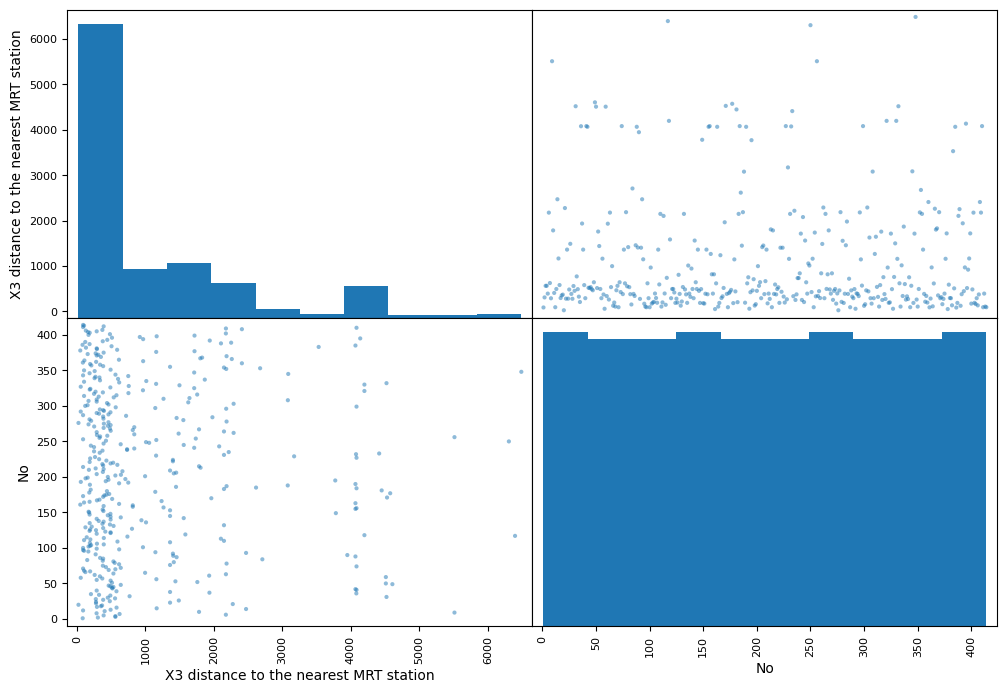

In [39]:
from pandas.plotting import scatter_matrix
attributes=[ 'X3 distance to the nearest MRT station','No']
scatter_matrix(housing[attributes],figsize=(12,8))